In [4]:
import pandas as pd
import matplotlib as plt

In [5]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [15]:
oil.head()
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


<Axes: xlabel='date'>

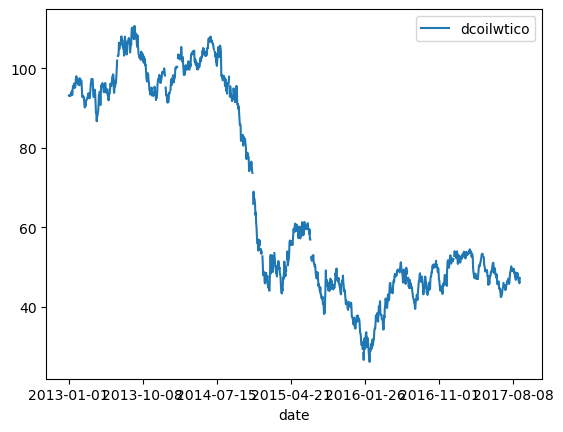

In [8]:
oil.plot(x = "date")

<Axes: xlabel='date'>

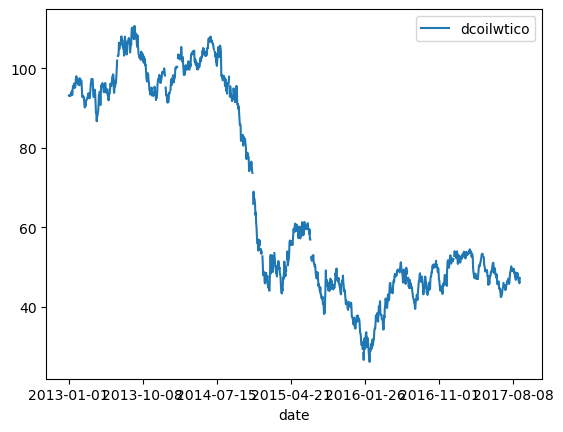

In [10]:
oil.set_index("date").plot()

<Axes: xlabel='date'>

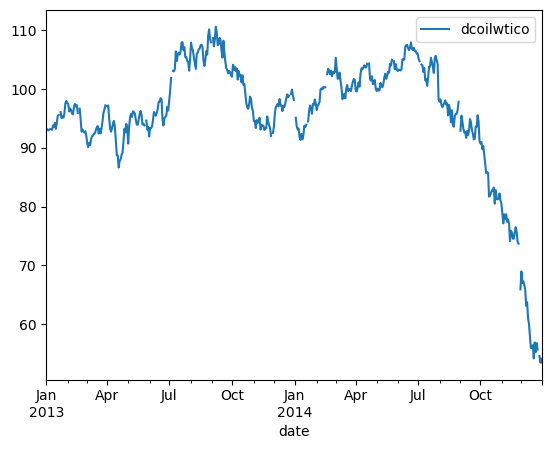

In [19]:
(oil
 .astype({"date": 'datetime64[ns]'})  # Convert date to datetime64
 .set_index("date")
 .loc["2013":"2014"]  # nice filtering here with dates
 .plot()
)

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

<Axes: xlabel='Date', ylabel='Oil Price'>

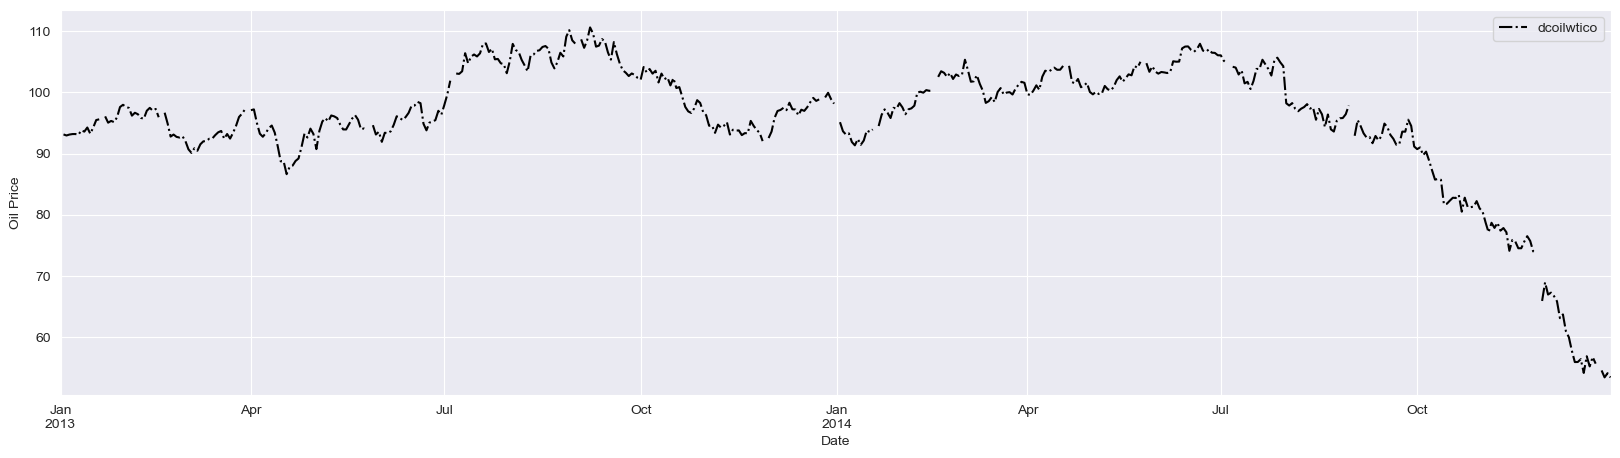

In [37]:
import seaborn as sns
sns.set_style("darkgrid")
(oil
 .astype({"date": 'datetime64[ns]'})  # Convert date to datetime64
 .set_index("date")
 .loc["2013":"2014"]  # nice filtering here with dates
 .plot(
     xlabel = "Date",
     ylabel = "Oil Price",
     color = "black",
     style  = "-.",
     figsize = (20,5),
     grid = True
 )
)

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [49]:
transactions = pd.read_csv("../retail/transactions.csv")
transactions.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [80]:
qu1 = (transactions.query( 'store_nbr in [1,2,3,4]')
       #.loc[:, ('date', 'transactions')] 
       .pivot_table(
           index = "date",
           columns = "store_nbr",
           values = 'transactions')
      )

qu1.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

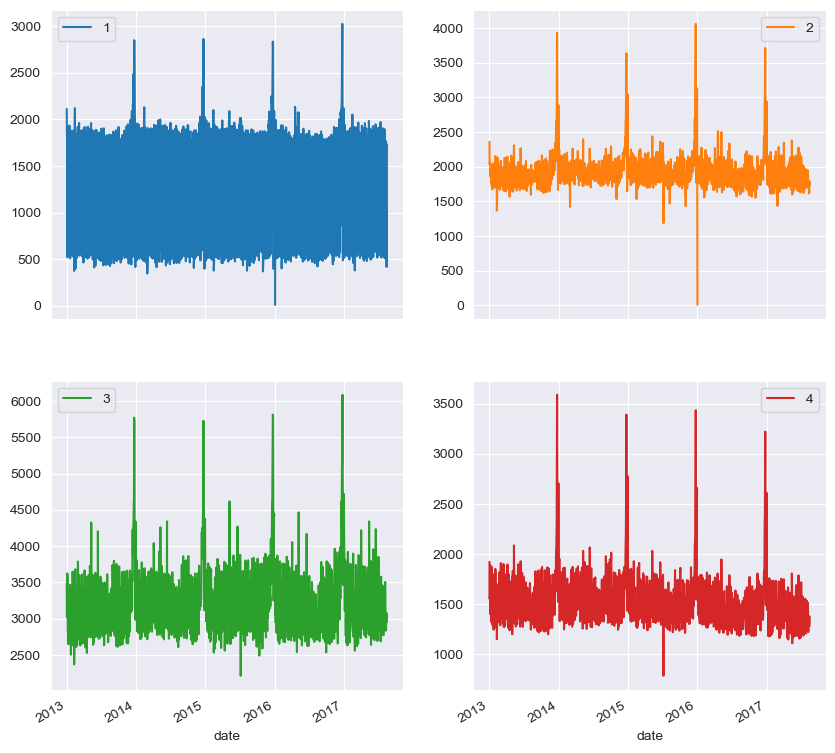

In [82]:
qu1.index = pd.to_datetime(qu1.index)
(qu1
 .plot(subplots = True, layout = (2,2), figsize = (10,10))
)

[Text(0, 0, 'Store 1'),
 Text(1, 0, 'Store 2'),
 Text(2, 0, 'Store 3'),
 Text(3, 0, 'Store 4')]

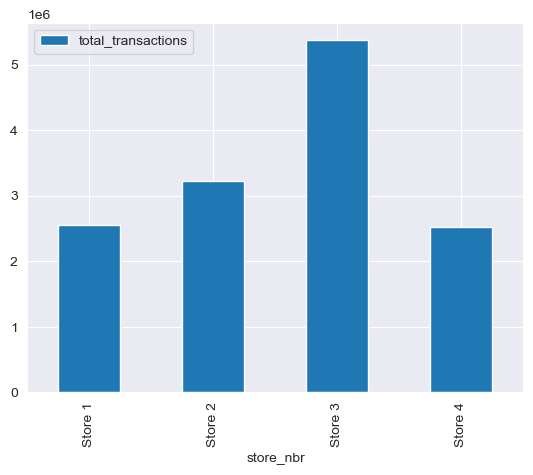

In [97]:
qu1.sum(axis = 0).reset_index(name ="total_transactions").plot.bar(x = "store_nbr").set_xticklabels(
    labels = ["Store 1","Store 2", "Store 3", "Store 4"]
)

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

<Axes: xlabel='store_nbr'>

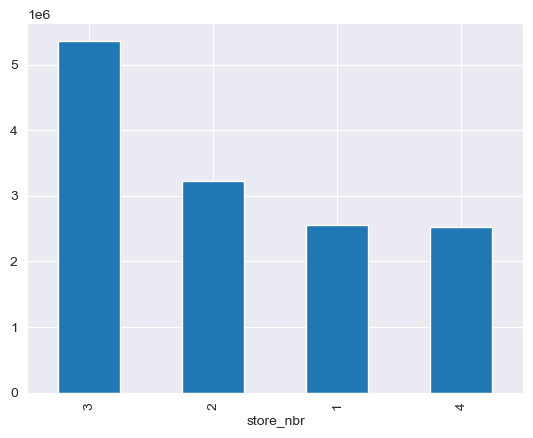

In [121]:
# convert dates to datetime64
qu1.index = qu1.index.astype("datetime64[ns]")
qu1.sum().sort_values(ascending = False).plot.bar()

<Axes: ylabel='date'>

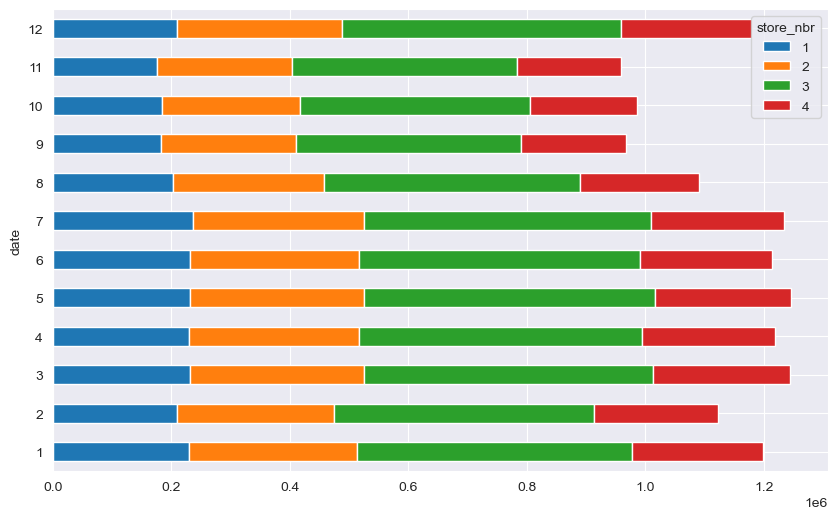

In [127]:
qu2 = qu1.groupby(qu1.index.month).sum()
qu2.plot.barh(
    stacked=True,
    figsize=(10, 6)    # optional size
)

In [ ]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.


<Axes: >

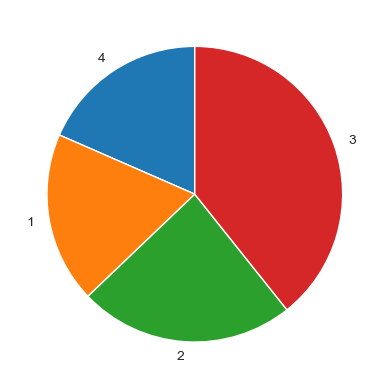

In [140]:
(qu2.sum()                        # sums of stores
 .sort_values(ascending=True)  # Sort from low to high
 .plot 
 .pie(startangle=90)           # start first slice at 12 o'clock
)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [128]:
qu1.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='2', ylabel='3'>

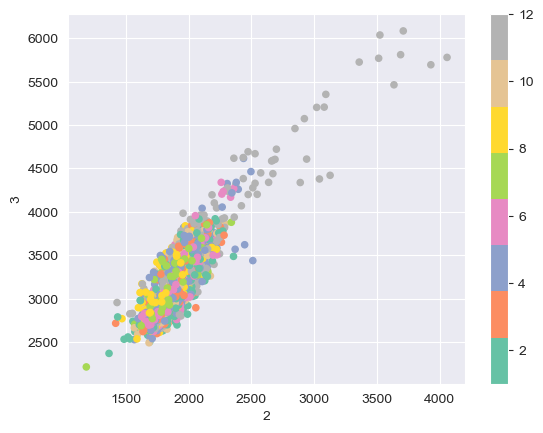

In [136]:
#qu1.index = qu1.index.astype("datetime64[ns]")
qu1.plot.scatter(
    x = 2,
    y = 3,
    c = qu1.index.month,
    cmap = "Set2")




# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [142]:
qu1.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

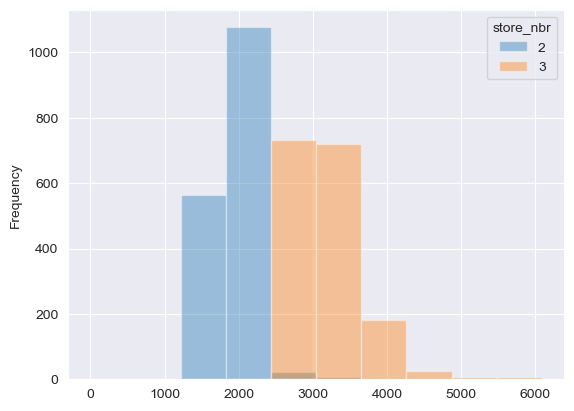

In [144]:
qu1[[2,3]].plot.hist(alpha = 0.4)

<Axes: ylabel='Frequency'>

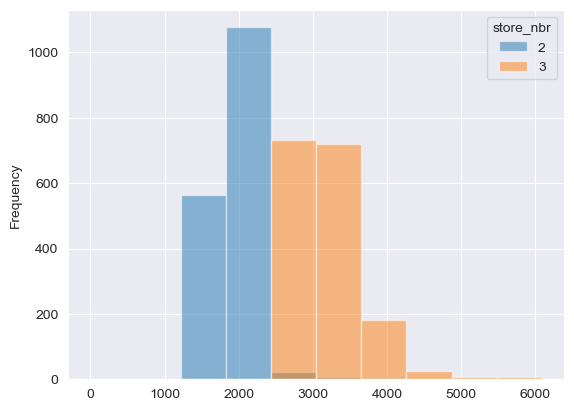

In [148]:
qu1.loc[:,[2,3]].plot.hist(alpha = 0.5)